# Simple Linear Regression

## 0.Import lib

In [291]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import f
import scipy.stats as stats

In [292]:
# import data
data = pd.read_csv("FuelConsumption (1).csv")

## 1.Explore Data

In [293]:
data.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [294]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [295]:
data.isnull().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


* Kiểm tra dữ liệu trùng lặp

In [297]:
data.loc[data.duplicated(keep=False)]

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
377,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,19.6,403
378,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,19.6,403


* Xử lý dữ liệu bị trùng lặp

In [298]:
data.drop_duplicates(inplace=True)

* Xóa đi các cột không cần thiết

In [299]:
fielts = ['Year', 'TRANSMISSION','FUEL']
data = data.drop(fielts,axis=1)
data

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,ACURA,1.6EL,COMPACT,1.6,4,10.5,216
1,ACURA,1.6EL,COMPACT,1.6,4,9.8,205
2,ACURA,3.2TL,MID-SIZE,3.2,6,13.7,265
3,ACURA,3.5RL,MID-SIZE,3.5,6,15.0,301
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,11.4,230
...,...,...,...,...,...,...,...
634,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,14.4,288
635,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,13.6,274
636,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,13.9,274
637,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,13.0,260


* Ta dự đoán rằng:
    - Kích thước động cơ có ảnh hưởng tới mức độ tiêu thụ nhiên liệu
    - Kích thước động cơ có ảnh hưởng tới lượng khí thải
    - Mức độ tiêu thụ nhiên liệu ảnh hưởng tới lượng khí thải
    - Số xi lanh ảnh hưởng tới mức độ tiêu thụ nhiên liệu
    - Số xi lanh ảnh hưởng tới lượng khí thải

* Kiểm tra phân phối của dữ liệu

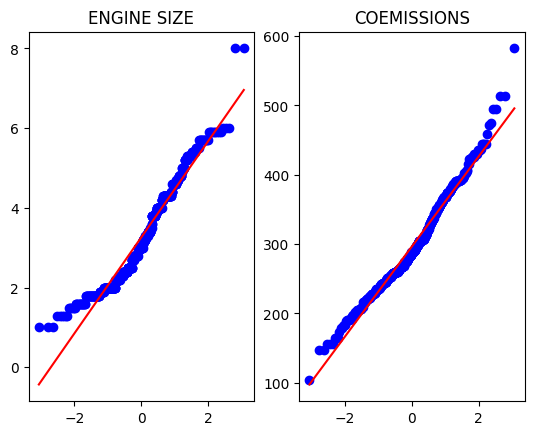

In [300]:
fig, ax = plt.subplots(nrows=1,ncols=2);

stats.probplot(data['ENGINE SIZE'], dist="norm", plot=ax[0]);
ax[0].set_title('ENGINE SIZE');
ax[0].set_xlabel("");  
ax[0].set_ylabel("");  

stats.probplot(data['COEMISSIONS '], dist="norm", plot=ax[1]);
ax[1].set_title('COEMISSIONS');
ax[1].set_xlabel("");
ax[1].set_ylabel("");

* Ta thấy đồ thị q-q plot của các cột dữ liệu đều nằm trên 1 đường thẳng => theo quy tắc bút chỉ béo, các cột dữ liệu có pp chuẩn

## 2.Build Model

* Tập trung xây dựng mô hình hồi quy cho biến X: Độ lớn của động cơ, Y: Mức độ ô nhiễm môi trường

In [301]:
x = data['ENGINE SIZE']
y = data['COEMISSIONS ']

* Phương pháp bình phương cực tiểu

In [302]:
Sxx = lambda x: ((x - np.mean(x)) ** 2).sum()
Sxy = lambda x, y: ((x - np.mean(x))*(y- np.mean(y))).sum()

# ham tinh ra hs chan b0 va hs goc b1
def My_Regession(x,y):

    b1 = Sxy(x,y) / Sxx(x)

    b0 = np.mean(y) - b1*np.mean(x)

    return [b0,b1]


In [303]:
b0 , b1 = My_Regession(x,y)
print(f"Mô hình hồi quy thực nghiệm: y^ = {round(b0,2)} + {round(b1,2)}x")

b0 = round(b0,4)
b1 = round(b1,4)

Mô hình hồi quy thực nghiệm: y^ = 149.22 + 45.16x


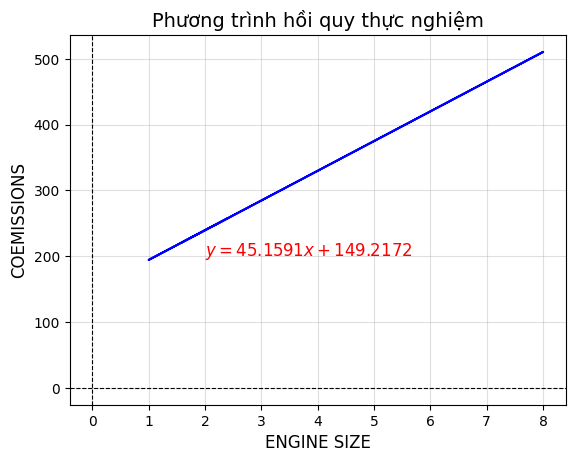

In [304]:
# Vẽ đồ thị
plt.plot(x, b0 + b1*x, label=f"y = {b1}x + {b0}", color="blue");

# Hiển thị phương trình bên cạnh đường thẳng
x_pos = 2;  # Vị trí x để đặt phương trình
y_pos = 200;  # Tính y tương ứng tại x_pos
plt.text(x_pos, y_pos, f"$y = {b1}x + {b0}$", fontsize=12, color="red");

# Thêm chú thích
plt.axhline(0, color='black', linewidth=0.8, linestyle="--");  # Trục x
plt.axvline(0, color='black', linewidth=0.8, linestyle="--");  # Trục y
plt.title("Phương trình hồi quy thực nghiệm", fontsize=14);
plt.xlabel("ENGINE SIZE", fontsize=12);
plt.ylabel("COEMISSIONS", fontsize=12);
plt.grid(alpha=0.4);
plt.show();


## 3. Hypothesis Testing

- Kiểm định giả thuyết: Độ lớn của động cơ có liên quan tới lượng khí thải phát ra.
  - H0: b1 = 0
  - H1: b1 ≠ 0

- Tính toán các sai số

In [305]:
SSt = lambda y: ((y - np.mean(y))**2).sum()
SSr = lambda x,y: My_Regession(x,y)[1]*Sxy(x,y)
SSe = lambda x,y: SSt(y) - SSr(x,y)
s = lambda x,y: np.sqrt(SSe(x,y) / (len(x) - 2) )

### a.Phương pháp kiểm định giả thuyết

In [306]:
# ham kiem tra gia thuyet co bac bo H0 khong
def Hypothesis_testing(x,y, alpha):
    df=len(x)-2
    t0 = round(My_Regession(x,y)[1] / s(x,y)*np.sqrt(Sxx(x)),4)

    cantren = round(stats.t.ppf(1 - alpha/2, df=len(x)-2),4)
    canduoi = round(stats.t.ppf(alpha/2, df=len(x)-2),4)

    if (t0 > cantren) | (t0 < canduoi):
        a = np.linspace(canduoi-4, cantren+4, 1000)
        b = stats.t.pdf(a, df)

        plt.plot(a, b, label=f"Đồ thị phân phối student (n={df})")

        plt.fill_between(a, b, where=(a >= cantren) | (a <= canduoi), color='red', alpha=0.5, label="Miền bác bỏ")

        plt.plot(t0, stats.t.pdf(t0, df), 'ro', label=f"Giá trị quan sát t0 = {t0}")

        plt.axvline(x=cantren, color='green', linestyle='--', label=f"Critical t (upper) = {cantren:.2f}")
        plt.axvline(x=canduoi, color='green', linestyle='--', label=f"Critical t (lower) = {canduoi:.2f}")

        plt.title("Bác bỏ giả thuyết H0")
        #plt.xlabel("t-values")
        #plt.ylabel("Probability Density")
        plt.legend()
        plt.show()

    else:
        a = np.linspace(canduoi-4, cantren+4, 1000)
        b = stats.t.pdf(a, df)

        plt.plot(a, b, label=f"Đồ thị phân phối student (n={df})")

        plt.fill_between(a, b, where=(a >= cantren) | (a <= canduoi), color='red', alpha=alpha, label="Miền bác bỏ")

        plt.plot(t0, stats.t.pdf(t0, df), 'ro', label=f"Giá trị quan sát t0 = {t0}")

        plt.axvline(x=cantren, color='green', linestyle='--', label=f"Cận trên = {cantren}")
        plt.axvline(x=canduoi, color='green', linestyle='--', label=f"Cận dưới = {canduoi}")

        plt.title("Chưa có cơ sở bác bỏ giả thuyết H0")
        #plt.xlabel("t-values")
        #plt.ylabel("Probability Density")
        plt.legend()
        plt.show()

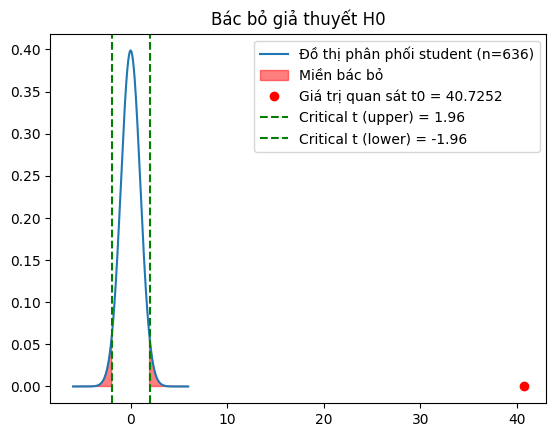

In [307]:
Hypothesis_testing(x,y,0.05)


### b.Phương pháp phân tích phương sai, lập bảng ANOVA

In [308]:
def Analysis_of_Variance(x,y,alpha):
    df1, df2 = [1,len(x) - 2]

    f0 = round(SSr(x,y)*df2 / SSe(x,y), 4)

    mocbacbo = round(stats.f.ppf(1 - alpha, df1, df2),4)
  
    if f0 > mocbacbo:
        a = np.linspace(0, mocbacbo+10, 1000)  
        b = stats.f.pdf(a, df1, df2)

        plt.figure(figsize=(10, 6))

        plt.plot(a, b, color='blue', label=f'Đồ thị phân phối Fisher (df1={df1}, df2={df2})')

        x_fill = np.linspace(mocbacbo, 10, 500)
        plt.fill_between(x_fill, stats.f.pdf(x_fill, df1, df2), color='red', alpha=0.5, label='Miền bác bỏ')

        plt.axvline(mocbacbo, color='green', linestyle='--', linewidth=2, label=f'Mốc bác bỏ = {mocbacbo}')

        plt.scatter([10], [0], color='red', zorder=5, s=100) 
        plt.text(10.5, 0.1, f'f0 = {f0}', color='red', fontsize=10, ha='left')
        plt.arrow(9.5, 0.05, 0.3, 0, head_width=0.02, head_length=0.2, fc='red', ec='red')

        plt.xlim(0, 10)
        plt.ylim(0, 0.6)

        plt.title('Bác bỏ giả thuyết H0', fontsize=16)
        plt.legend(fontsize=10)
        plt.grid(alpha=0.3)
        plt.show()


    else:
        a = np.linspace(0, mocbacbo+10, 1000)  
        b = stats.f.pdf(a, df1, df2)

        plt.figure(figsize=(10, 6))

        plt.plot(a, b, color='blue', label=f'Đồ thị phân phối Fisher (df1={df1}, df2={df2})')

        x_fill = np.linspace(mocbacbo, 10, 500)
        plt.fill_between(x_fill, stats.f.pdf(x_fill, df1, df2), color='red', alpha=0.5, label='Miền bác bỏ')

        plt.axvline(mocbacbo, color='green', linestyle='--', linewidth=2, label=f'Mốc bác bỏ = {mocbacbo}')

        plt.scatter([10], [0], color='red', zorder=5, s=100) 
        plt.text(10.5, 0.1, f'f0 = {f0}', color='red', fontsize=10, ha='left')
        plt.arrow(9.5, 0.05, 0.3, 0, head_width=0.02, head_length=0.2, fc='red', ec='red')

        plt.xlim(0, 10)
        plt.ylim(0, 0.6)

        plt.title('Chưa có cơ sở bác bỏ giả thuyết H0', fontsize=16)
        plt.legend(fontsize=10)
        plt.grid(alpha=0.3)
        plt.show()

    
    return f0


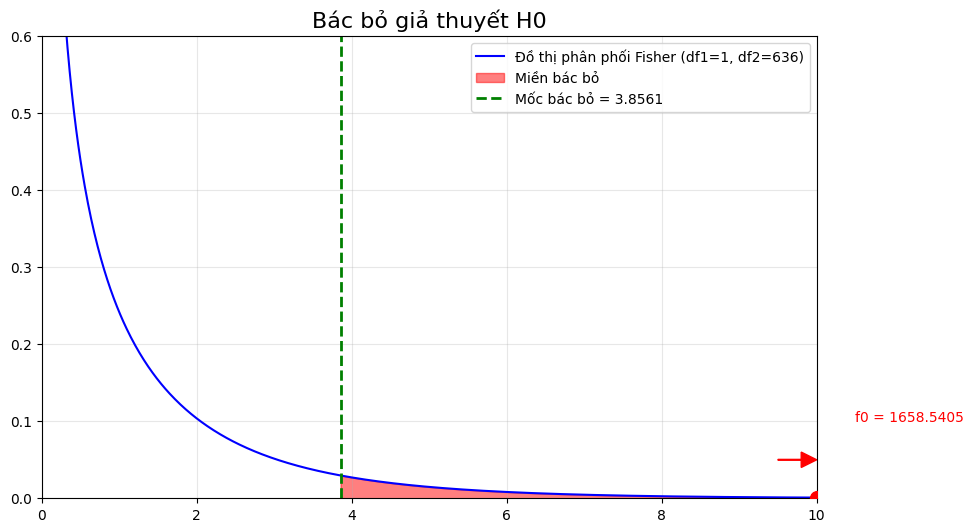

np.float64(1658.5405)

In [309]:
Analysis_of_Variance(x,y,0.05)

- Bảng phân tích ANOVA


In [310]:
# hàm in ra bảng phân tích phương sai anova
def print_anova(x,y,alpha):
    anova_table = {
        "Nguồn": ["Hồi quy", "Sai số", "Tổng"],
        "Tổng bình phương": [SSr(x,y), SSe(x,y), SSt(y)],
        "Bậc tự do": [1, len(x)-2, ""],
        "Bình phương trung bình": [SSr(x,y)/1, SSe(x,y)/(len(x)-2), ""],
        "f0": ["", "", round(SSr(x,y)*(len(x)-2) / SSe(x,y), 4)]}

    anova_df = pd.DataFrame(anova_table)
    return anova_df


print_anova(x,y,0.05)

,Nguồn,Tổng bình phương,Bậc tự do,Bình phương trung bình,f0
0,Hồi quy,1.970578e+06,1,1970577.722274,
1,Sai số,7.556568e+05,636,1188.13962,
2,Tổng,2.726235e+06,,,1658.5405


    - Cả 2 phương án kiểm định đều dẫn đến bác bỏ giả thuyết H0, vì vậy biến x có ý nghĩa hồi quy với biến y với độ tin cậy 95%

## 4.Residual Analysis

In [311]:
# tính phần dư
b0, b1 = My_Regession(x,y)
y_reg = b0 + b1*x
ei = y - y_reg

- Kiểm định giả thuyết về phương sai và kỳ vọng

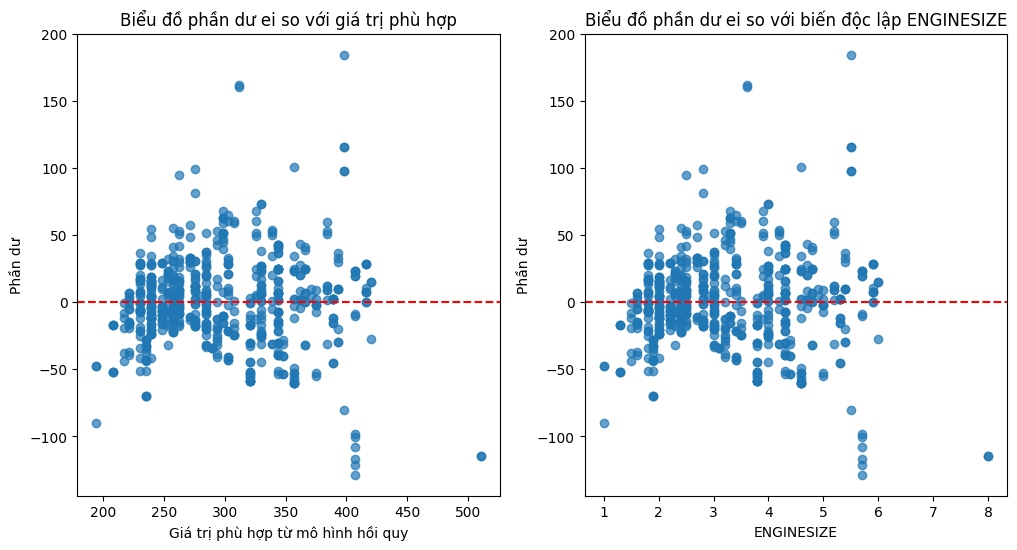

In [312]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6));

# Biểu đồ phần dư so với giá trị phù hợp
ax[0].scatter(y_reg, ei, alpha=0.7);
ax[0].axhline(0, color='red', linestyle='--');
ax[0].set_title("Biểu đồ phần dư ei so với giá trị phù hợp");
ax[0].set_xlabel("Giá trị phù hợp từ mô hình hồi quy");
ax[0].set_ylabel("Phần dư");

# Biểu đồ phần dư so với biến độc lập (ENGINESIZE)
ax[1].scatter(x, ei, alpha=0.7);
ax[1].axhline(0, color='red', linestyle='--');
ax[1].set_title("Biểu đồ phần dư ei so với biến độc lập ENGINESIZE");
ax[1].set_xlabel("ENGINESIZE");
ax[1].set_ylabel("Phần dư");



    - Từ biểu đồ phần dư, ta thấy nó rơi vào tình huống lý tưởng
    

- Kiểm tra tính độc lập của phần dư
    - Sử dụng biểu đồ tự tương quan (ACF - Autocorrelation Function)
        - Biểu đồ tự tương quan giúp kiểm tra xem các phần dư có phụ thuộc vào nhau ở các độ trễ khác nhau hay không. Nếu các phần dư không độc lập, ACF sẽ cho thấy sự tự tương quan ở các độ trễ (lag) khác nhau.
        - Tương quan mạnh mẽ (Strong Autocorrelation):Nếu các cột trong biểu đồ ACF có giá trị rất gần với 1 hoặc -1 tại các độ trễ, điều này cho thấy các phần dư tại các thời điểm khác nhau có sự liên kết chặt chẽ với nhau.
        - Tương quan yếu (Weak Autocorrelation): Nếu giá trị ACF gần 0, điều này cho thấy không có sự tự tương quan hoặc chỉ có sự tự tương quan rất yếu giữa các phần dư tại các thời điểm khác nhau.

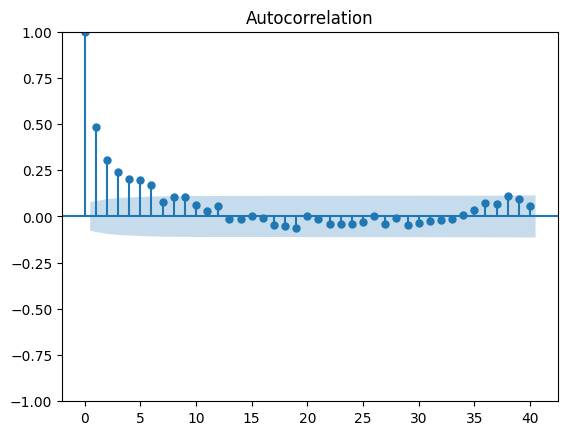

In [313]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ei, lags=40)  
plt.show()

    - Ta thấy rằng giá trị ACF gần 0, điều này cho thấy không có sự tự tương quan hoặc chỉ có sự tự tương quan rất yếu giữa các phần dư tại các thời điểm khác nhau

- Kiểm tra phân phối chuẩn

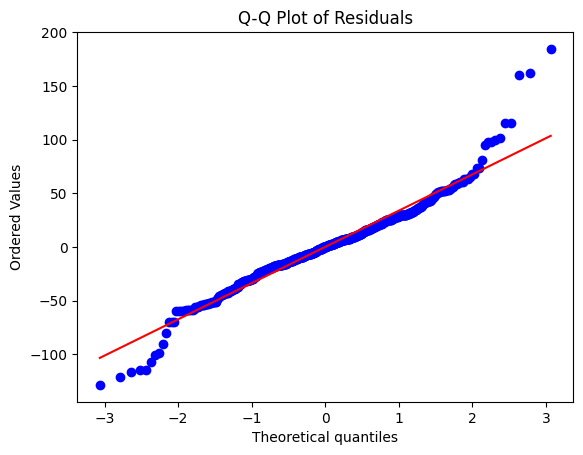

In [314]:
fig, ax = plt.subplots()
stats.probplot(ei, dist="norm", plot=ax)
ax.set_title("Q-Q Plot of Residuals")
plt.show()

    - Ta thấy được phần dư xấp xỉ phân phối chuẩn

* Từ đó ta thấy phương sai thỏa mãn các điều kiện ban đầu:
    - Độc lập
    - Kỳ vọng = 0, Phương sai cố định
    - Tuân theo phân phối chuẩn

## 5.Coefficient of determination (R^2)

- Đo lường sự giải thích của biến độc lập lên biến phụ thuộc

In [315]:
r2 = round(SSr(x,y) / SSt(y),4)
print(f"Biến độc lập ENGINESIZE giải thích được {r2*100}% biến phụ thuộc COEMISSIONS, mô hình là phù hợp")

Biến độc lập ENGINESIZE giải thích được 72.28% biến phụ thuộc COEMISSIONS, mô hình là phù hợp


## 6.Prediction

- Sử dụng mô hình để dự báo lượng khí thải phát ra khi có dữ liệu về độ lớn động cơ

In [316]:
# Sử dụng ngẫu nhiên một size động cơ
a = 3.5
print(f"Lượng khí thải do xe này phát ra là: {b0+b1*a}")
data[data['ENGINE SIZE'] == 3.5]

Lượng khí thải do xe này phát ra là: 307.2741363197896


,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
3,ACURA,3.5RL,MID-SIZE,3.5,6,15.0,301
134,CHRYSLER,300M,FULL-SIZE,3.5,6,14.4,283
142,CHRYSLER,INTREPID,FULL-SIZE,3.5,6,14.4,283
143,CHRYSLER,LHS,FULL-SIZE,3.5,6,14.7,288
329,HONDA,ODYSSEY,MINIVAN,3.5,6,14.9,292
353,ISUZU,TROOPER 4X4,SUV,3.5,6,17.8,366
354,ISUZU,TROOPER 4X4,SUV,3.5,6,17.9,368
458,OLDSMOBILE,INTRIGUE,MID-SIZE,3.5,6,14.7,283
460,PLYMOUTH,PROWLER,SUBCOMPACT,3.5,6,15.4,308


    - 307.27405 là lượng phát thải trung bình của các hãng xe có độ lớn động cơ là 3.5
    - Từ đó ta thấy được ngoài độ lớn động cơ, các yếu tố khác cũng có ảnh hưởng tới lượng khí phát thải

## 7. Conclusion

- Dựa vào kiểm định giả thuyết (Mục 3), ta thấy biến X có ý nghĩa trong việc giải thích biến Y
- Dựa vào phân tích sai số ngẫu nhiên (mục 4), ta thấy giả thuyết về sai số được đáp ứng
-> Mô hình phù hợp với ảnh hưởng của X lên Y chiếm 72,82% (Mục 5)

# Multiple Linear Regression

## 1.Build model

- Ta xem xét việc xây dựng mô hình hồi quy đa biến với các biến độc lập
    - 'ENGINE SIZE': Độ lớn động cơ
    - 'CYLINDERS': Số xi lanh
    - 'FUEL CONSUMPTION': Mức độ tiêu thụ nhiên liệu
    - 'MAKE': Nhà sản xuất
- Tác động tới biến phụ thuộc là Y: Mức độ phát thải

- Do biến nhà sản xuất 'MAKE' có kiểu dữ liệu string không thể hồi quy, ta sẽ mã hóa cột dữ liệu này

In [318]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['MAKE_ENCODE'] = label_encoder.fit_transform(data['MAKE'])
data['MODEL_ENCODE'] = label_encoder.fit_transform(data['MODEL'])
data['VEHICLE CLASS_ENCODE'] = label_encoder.fit_transform(data['VEHICLE CLASS'])

    - Ta có thêm cột MAKE_ENCODE để biểu thị các hãng xe khác nhau bằng kiểu dữ liệu số nguyên

- Kiểm tra đa cộng tuyến: Ta cần kiểm tra các biến độc lập vừa xét có xảy ra đa cộng tuyến hay không bằng biểu đồ nhiệt và sử dụng ma trận hệ số tương quan

    - Đưa ra một bảng dữ liệu mới, bỏ đi cột chưa mã hóa


In [319]:
fielts = ['MAKE','MODEL','VEHICLE CLASS']
data_new = data.drop(fielts,axis=1)

In [320]:
#tao ma tran he so tuong quan bang ham co san trong python
cereal_corr = data_new.corr(numeric_only = True) # get correlation data
cereal_corr 

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS,MAKE_ENCODE,MODEL_ENCODE,VEHICLE CLASS_ENCODE
ENGINE SIZE,1.000000,0.894084,0.858498,0.850188,-0.390095,-0.071672,0.288024
CYLINDERS,0.894084,1.000000,0.825247,0.797799,-0.369091,-0.111805,0.157955
FUEL CONSUMPTION,0.858498,0.825247,1.000000,0.983184,-0.365014,-0.071930,0.333268
COEMISSIONS,0.850188,0.797799,0.983184,1.000000,-0.338151,-0.047835,0.381268
MAKE_ENCODE,-0.390095,-0.369091,-0.365014,-0.338151,1.000000,0.164809,-0.066571
MODEL_ENCODE,-0.071672,-0.111805,-0.071930,-0.047835,0.164809,1.000000,0.203664
VEHICLE CLASS_ENCODE,0.288024,0.157955,0.333268,0.381268,-0.066571,0.203664,1.000000


<Axes: >

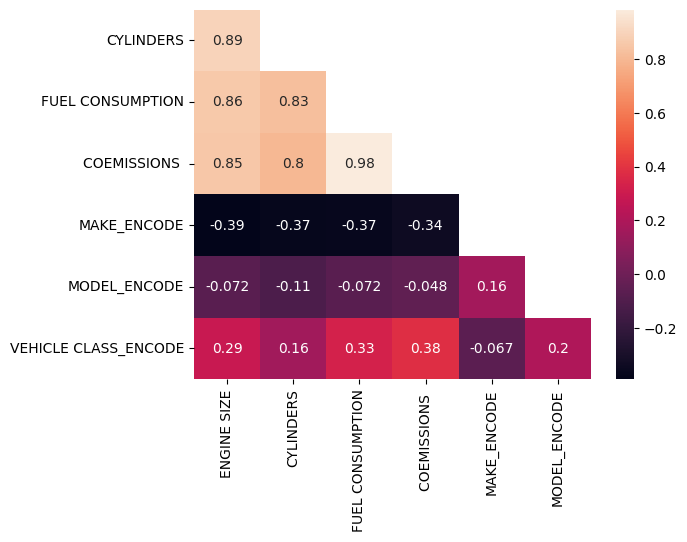

In [321]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ones_corr = np.ones_like(cereal_corr, dtype=bool)

mask = np.triu(ones_corr)

adjusted_mask = mask[1:,:-1]

adjusted_cereal_corr = cereal_corr.iloc[1:,:-1]

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True)

- Từ bảng hệ số tương quan, kết hợp cùng biểu đồ nhiệt trực quan hóa, ta thấy:
    - 'CYLINDERS' VÀ 'ENGINE SIZE' có hệ số tương quan 0.89
    - 'FUEL CONSUMPTION' và 'CYLINDERS' có hệ số tương quan là 0.83
    - 'FUEL CONSUMPTION' và 'ENGINE SIZE' có hệ số tương quan là 0.86
    - 'MAKE' và 'COEMISSIONS' có hệ số tương quan rất bé
- Ta thấy các biến có mối tương quan rất mạnh, để không ảnh hưởng tới mô hình, ta sẽ loại đi 2 biến 'FUEL CONSUMPTION' và 'CYLINDERS',
    giữ lại biến 'ENGINE SIZE'
- Ngoài ra, biến 'MAKE' có tương quan nhỏ tới 'COEMISSIONS' nên ta cũng không xem xét
- Vậy ta đi xây dựng mô hình hồi quy tuyến tính bội cho 2 biến độc lập và 1 biến phụ thuộc:
    - x1 là 'ENGINE SIZE'
    - x2 là 'VEHICLE CLASS'
    - y là 'COEMISSIONS'

In [359]:
x1 = data_new['ENGINE SIZE']
x2 = data_new['VEHICLE CLASS_ENCODE']
x = [x1,x2]
y = data_new['COEMISSIONS ']
y = np.array(y)
n = len(x1)

- Xây dựng hàm tìm ra mô hình hồi quy thực nghiệm

In [323]:
#xây dựng hàm trả về ma trận hệ số B, đầu vào là một danh sach các biến độc lập, một bien y gồm biến phụ thuộc trong mo hinh
# ham nay tra ve ma tran he so
def My_Regession_Mul(X,y):
    y = y.T
    x = np.ones((len(X[0]), 1))
    for i in X:
        x = np.column_stack((x, i))
    
    B = np.round((np.linalg.inv((x.T@x))@x.T@y),4)

    return x, B

- Xây dựng mô hình trong ví dụ

In [349]:
B = My_Regession_Mul(x,y)[1]
print(f"Mô hình hồi quy tuyến tính bội thực nghiệm: y = {B[0]} + {B[1]}x1 + {B[2]}x2")

Mô hình hồi quy tuyến tính bội thực nghiệm: y = 142.6254 + 42.8837x1 + 2.4123x2


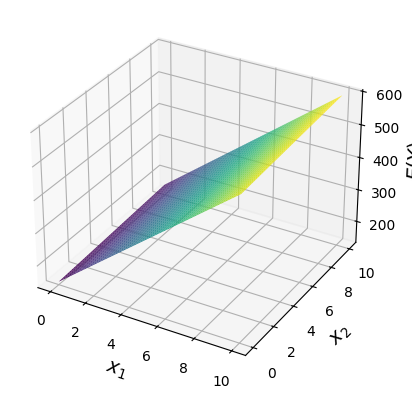

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Tạo lưới điểm (x1, x2)
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
x1, x2 = np.meshgrid(x1, x2)

# Định nghĩa phương trình mặt phẳng: z = ax1 + bx2 + c
B = My_Regession_Mul(x,y)[1]  # Các hệ số mẫu
a,b,c = B
z = a + b*x1 + c*x2

# Vẽ đồ thị
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x1, x2, z, cmap='viridis', edgecolor='none')

# Gắn nhãn các trục
ax.set_xlabel(r'$x_1$', fontsize=14)
ax.set_ylabel(r'$x_2$', fontsize=14)
ax.set_zlabel(r'$E(Y)$', fontsize=14)

# Hiển thị đồ thị
plt.show()


## 2.Hypothesis Testing

- Tính toán các sai số

In [326]:
#Tạo các hàm tính sai số
SSE = lambda x,y: y.T@y - My_Regession_Mul(x,y)[1].T@My_Regession_Mul(x,y)[0].T@y
SSR = lambda x,y: My_Regession_Mul(x,y)[1].T@My_Regession_Mul(x,y)[0].T@y - np.sum(y)**2/len(x[0])
SST = lambda x,y: y.T@y - np.sum(y)**2/len(x[0])
s = lambda x,y,so_bien: np.sqrt(SSE(x,y)/n-so_bien-1)

### a.Kiểm tra ý nghĩa chung của hàm hồi quy

- Phương pháp phân tích phương sai ANOVA

In [327]:
# ham kiem tra gia thuyet co bac bo H0 khong
def Analysis_of_Variance_mul(x,y, alpha,so_bien):
    df1 = so_bien
    df2 = n - so_bien - 1

    f0 = round(SSR(x,y)*df2/(SSE(x,y)*df1),4)

    mocbacbo = round(stats.f.ppf(1 - alpha / 2, df1, df2), 4)


    if f0 > mocbacbo:
        a = np.linspace(0, mocbacbo + 2, 1000) 
        b = f.pdf(a, df1, df2)

        plt.figure(figsize=(10, 6)) 
        plt.plot(a, b, label=f"Đồ thị phân phối Fisher (df1={df1}, df2={df2})", color='blue')
        plt.axvline(mocbacbo, color='green', linestyle='--', label=f"Mốc bác bỏ = {mocbacbo}")

        plt.fill_between(a, b, where=(a > mocbacbo), color='red', alpha=0.5, label="Miền bác bỏ")

        plt.scatter([mocbacbo+2], [0], color='red', label=f"Giá trị quan sát f0 = {f0}", zorder=5)  
        plt.text(mocbacbo+2, 0.02, f"f0 = {f0}", color='red', fontsize=12)  

        plt.title("Bác bỏ giả thuyết H0", fontsize=14)
        plt.legend()
        plt.grid(alpha=0.3)

        plt.xlim(0, mocbacbo + 2)  
        plt.show()

    else:
        a = np.linspace(0, 5, 1000) 
        b = f.pdf(a, df1, df2)

        plt.figure(figsize=(10, 6)) 
        plt.plot(a, b, label=f"Đồ thị phân phối Fisher (df1={df1}, df2={df2})", color='blue')
        plt.axvline(mocbacbo, color='green', linestyle='--', label=f"Mốc bác bỏ = {mocbacbo}")

        plt.fill_between(a, b, where=(a > mocbacbo), color='red', alpha=0.5, label="Miền bác bỏ")

        plt.scatter([mocbacbo+2], [0], color='red', label=f"Giá trị quan sát f0 = {f0}", zorder=5)  
        plt.text(mocbacbo+2, 0.02, f"f0 = {f0}", color='red', fontsize=12)  

        plt.title("Chưa có cơ sở bác bỏ giả thuyết H0", fontsize=14)
        plt.legend()
        plt.grid(alpha=0.3)

        plt.xlim(0, mocbacbo + 2)  
        plt.show()

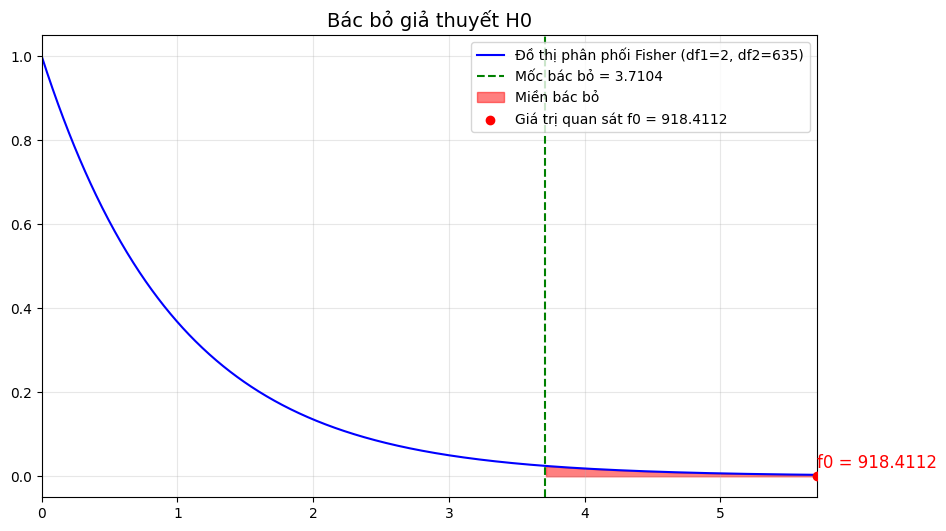

In [328]:
Analysis_of_Variance_mul(x,y,0.05,2)

    - Bác bỏ giả thuyết H0 với độ tin cậy 95%, mô hình có ý nghĩa

- Lập bảng phân tích phương sai ANOVA

In [329]:
# hàm in ra bảng phân tích phương sai anova
def print_anova_mul(x,y,alpha,so_bien):
    anova_table = {
        "Nguồn": ["Hồi quy", "Sai số", "Tổng"],
        "Tổng bình phương": [SSR(x,y), SSE(x,y), SST(x,y)],
        "Bậc tự do": [so_bien, n-so_bien-1, ""],
        "Bình phương trung bình": [SSR(x,y)/so_bien, SSE(x,y)/(n-so_bien-1), ""],
        "f0": ["", "", round(SSR(x,y)*(n-so_bien-1) / (SSE(x,y)*so_bien), 4)]}

    anova_df = pd.DataFrame(anova_table)
    return anova_df

print_anova_mul(x,y,0.05,2)

,Nguồn,Tổng bình phương,Bậc tự do,Bình phương trung bình,f0
0,Hồi quy,2.025877e+06,2,1012938.592998,
1,Sai số,7.003573e+05,635,1102.924936,
2,Tổng,2.726235e+06,,,918.4112


    - Ta thấy giá trị quan sát thuộc miền bác bỏ, ta bác bỏ giả thuyết H0 và chấp nhận rằng các biến có ý nghĩa hồi quy với biến hồi quy y

### b.Kiểm tra ý nghĩa từng biến trong hàm hồi quy

- Danh sách các biến
    - x1 = data['ENGINE SIZE']
    - x2 = data['MAKE']
    - y = data['COEMISSIONS ']

- Xây dựng hàm tìm sai số cho các hệ số hồi quy

In [330]:
def se_func(x,y):
    a, beta = My_Regession_Mul(x,y)

    y_pred = a @ beta

    sse = np.sum((y - y_pred) ** 2)

    C = np.linalg.inv(a.T @ a)

    se = np.sqrt(np.diag(C) * (sse / (a.shape[0] - a.shape[1])))

    return se

- Ta đi xây dựng hàm kiểm tra ý nghĩa của các biến độc lập 


In [331]:
# Đầu vào với x là list các biến độc lập, y là biến phụ thuộc,so_bien là số các biến độc lập và i là kiểm định cho hệ số hồi quy riêng của biến số mấy
def Hypothesis_testing_mul_sep(x,y,alpha,so_bien,i):
    df=n-so_bien-1

    t0 = np.round(My_Regession_Mul(x,y)[1][i]/ se_func(x,y)[i],4)

    cantren = round(stats.t.ppf(1 - alpha/2, df),4)
    canduoi = round(stats.t.ppf(alpha/2, df),4)

    if (t0 > cantren) | (t0 < canduoi):
        a = np.linspace(canduoi - 4, cantren + 4, 1000)
        b = stats.t.pdf(a, df)

        plt.plot(a, b, label=f"Đồ thị phân phối student (n={df})")

        plt.fill_between(a, b, where=(a >= cantren) | (a <= canduoi), color='red', alpha=0.5, label="Miền bác bỏ")

        plt.plot(t0, stats.t.pdf(t0, df), 'ro', label=f"Giá trị quan sát t0 = {t0}")

        plt.axvline(x=cantren, color='green', linestyle='--', label=f"Critical t (upper) = {cantren:.2f}")
        plt.axvline(x=canduoi, color='green', linestyle='--', label=f"Critical t (lower) = {canduoi:.2f}")

        plt.title("Bác bỏ giả thuyết H0")
        #plt.xlabel("t-values")
        #plt.ylabel("Probability Density")
        plt.legend()
        plt.show()
    else:
        a = np.linspace(canduoi - 4, cantren + 4, 1000)
        b = stats.t.pdf(a, df)

        plt.plot(a, b, label=f"Đồ thị phân phối student (n={df})")

        plt.fill_between(a, b, where=(a >= cantren) | (a <= canduoi), color='red', alpha=0.5, label="Miền bác bỏ")

        plt.plot(t0, stats.t.pdf(t0, df), 'ro', label=f"Giá trị quan sát t0 = {t0}")

        plt.axvline(x=cantren, color='green', linestyle='--', label=f"Critical t (upper) = {cantren:.2f}")
        plt.axvline(x=canduoi, color='green', linestyle='--', label=f"Critical t (lower) = {canduoi:.2f}")

        plt.title("Chưa có cơ sở bác bỏ giả thuyết H0")
        #plt.xlabel("t-values")
        #plt.ylabel("Probability Density")
        plt.legend()
        plt.show()



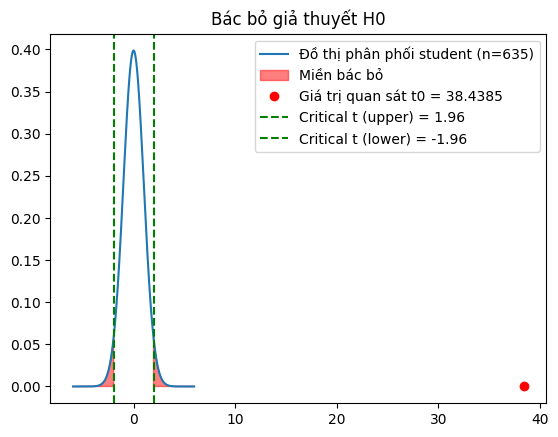

In [332]:
Hypothesis_testing_mul_sep(x,y,0.05,2,1)

    - Bác bỏ giả thuyết H0 với độ tin cậy 95%, tức là biến 'ENGINESIZE' có ý nghĩa trong hồi quy

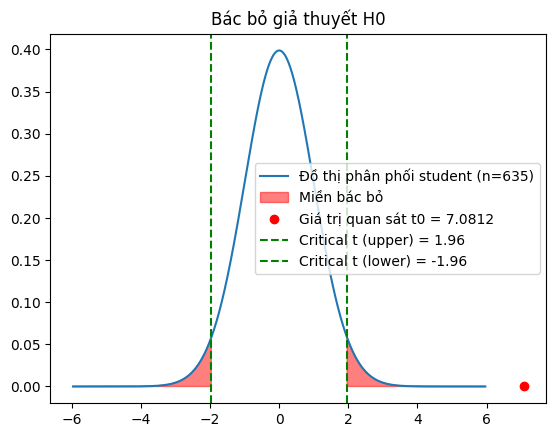

In [333]:
Hypothesis_testing_mul_sep(x,y,0.05,2,2)

    - Bác bỏ giả thuyết H0 với độ tin cậy 95%, tức là biến 'VEHICLE CLASS' có ý nghĩa trong hồi quy

## 3.Phù hợp của mô hình

- Đưa ra hệ số xác định hiệu chỉnh

In [334]:
R2adj = lambda x,y,so_bien: 1 - SSE(x,y)*(len(x[0])-1) / (SST(x,y)*(len(x[0])-1-so_bien))
R2 = lambda x,y: 1 - SSE(x,y)/SST(x,y)

In [335]:
R2adj(x,y,2)

np.float64(0.7422953971857439)

    - Ta thấy hệ số Radj = 0.7423, tức là mô hình giải thích được 74.23% sự thay đổi của biến phụ thuộc y. Do đó mô hình là phù hợp

## 4. Kiểm định phần dư

- Tính toán sai số ngẫu nhiên

In [352]:
#Hàm tính ra sai số ngẫu nhiên của mô hình, đầu vào là ma trận X là ma trận có các cột là [1 x1 x2] và y là ma trận biến phụ thuộc
def ei_mul(x,y):
    x_concat,B = My_Regession_Mul(x,y)
    ei = []  # Khởi tạo danh sách rỗng

    for i in range(x_concat.shape[0]):
        ei.append(y[i] - x_concat[i] @ B.T)
        
    return ei

In [367]:
# Hàm tính ra biến phụ thuộc được dự đoán từ mô hình
def y_reg_mul(x,y):
    y_pre = []
    x_con,B = My_Regession_Mul(x,y)
    y_pre.append(x_con @ B.T)

    return y_pre

In [361]:
ei_mul(x,y) #sai số ngẫu nhiên của mô hình vừa xây dựng

[np.float64(4.760679999999979),
 np.float64(-6.239320000000021),
 np.float64(-19.677840000000003),
 np.float64(3.457050000000038),
 np.float64(-11.526759999999996),
 np.float64(-22.526759999999996),
 np.float64(-18.526759999999996),
 np.float64(13.01279999999997),
 np.float64(4.436059999999998),
 np.float64(31.183940000000007),
 np.float64(3.183940000000007),
 np.float64(22.30024000000003),
 np.float64(-2.6997599999999693),
 np.float64(47.18394000000001),
 np.float64(26.183940000000007),
 np.float64(29.30024000000003),
 np.float64(25.30024000000003),
 np.float64(26.475640000000055),
 np.float64(26.41414000000003),
 np.float64(40.76401000000004),
 np.float64(40.76401000000004),
 np.float64(38.475640000000055),
 np.float64(29.475640000000055),
 np.float64(-19.56153999999998),
 np.float64(-19.56153999999998),
 np.float64(45.58861000000002),
 np.float64(45.58861000000002),
 np.float64(32.947040000000015),
 np.float64(32.947040000000015),
 np.float64(-0.3513599999999997),
 np.float64(13.648

- Kiểm định giả thuyết độc lập

    - Kiểm tra tính độc lập của phần dư
        - Sử dụng biểu đồ tự tương quan (ACF - Autocorrelation Function)
            - Biểu đồ tự tương quan giúp kiểm tra xem các phần dư có phụ thuộc vào nhau ở các độ trễ khác nhau hay 
                không. Nếu các phần dư không độc lập, ACF sẽ cho thấy sự tự tương quan ở các độ trễ (lag) khác nhau.
            - Tương quan mạnh mẽ (Strong Autocorrelation):Nếu các cột trong biểu đồ ACF có giá trị rất gần với 1 
                hoặc -1 tại các độ trễ, điều này cho thấy các phần dư tại các thời điểm khác nhau có sự liên kết chặt chẽ với nhau.
            - Tương quan yếu (Weak Autocorrelation): Nếu giá trị ACF gần 0, điều này cho thấy không có sự tự tương 
                quan hoặc chỉ có sự tự tương quan rất yếu giữa các phần dư tại các thời điểm khác nhau.

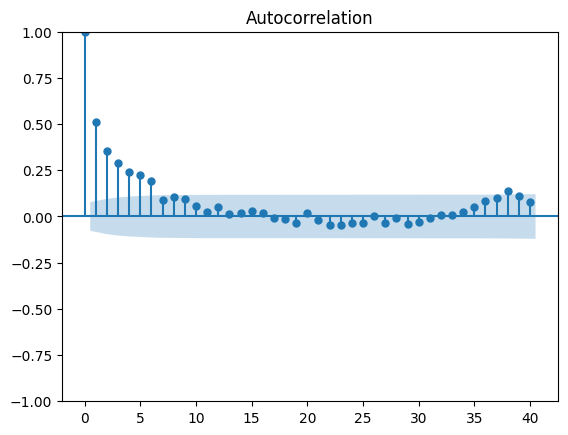

In [363]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ei_mul(x,y), lags=40)  
plt.show()

    - Ta thấy rằng giá trị ACF gần 0, điều này cho thấy không có sự tự tương quan hoặc chỉ có sự tự tương quan rất yếu giữa các phần dư tại các thời điểm khác nhau

- Kiểm định giả thuyết về phân phối chuẩn

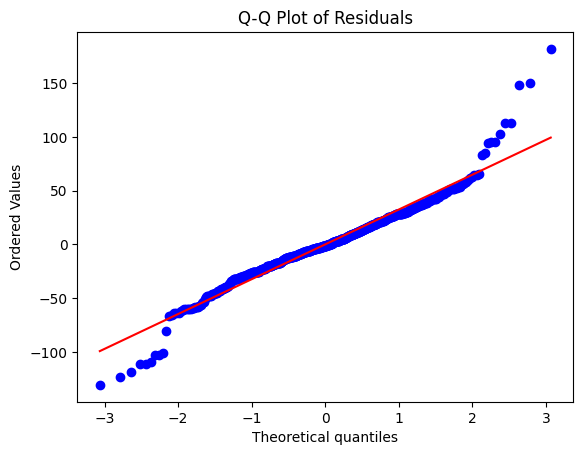

In [362]:
fig, ax = plt.subplots()
stats.probplot(ei_mul(x,y), dist="norm", plot=ax)
ax.set_title("Q-Q Plot of Residuals")
plt.show()

    - Ta thấy phần dư xấp xỉ phân phối chuẩn

- Kiểm định giả thuyết về kỳ vọng và phương sai

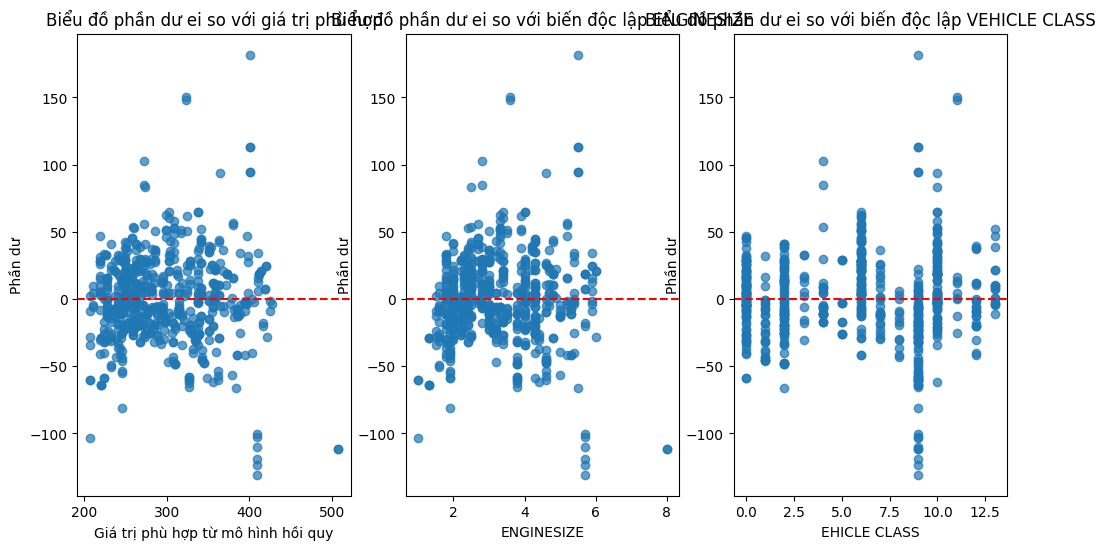

In [371]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6));

# Biểu đồ phần dư so với giá trị phù hợp
ax[0].scatter(y_reg_mul(x,y), ei_mul(x,y), alpha=0.7);
ax[0].axhline(0, color='red', linestyle='--');
ax[0].set_title("Biểu đồ phần dư ei so với giá trị phù hợp");
ax[0].set_xlabel("Giá trị phù hợp từ mô hình hồi quy");
ax[0].set_ylabel("Phần dư");

# Biểu đồ phần dư so với biến độc lập (ENGINESIZE)
ax[1].scatter(x1, ei_mul(x,y), alpha=0.7);
ax[1].axhline(0, color='red', linestyle='--');
ax[1].set_title("Biểu đồ phần dư ei so với biến độc lập ENGINESIZE");
ax[1].set_xlabel("ENGINESIZE");
ax[1].set_ylabel("Phần dư");

# Biểu đồ phần dư so với biến độc lập (VEHICLE CLASS)
ax[2].scatter(x2, ei_mul(x,y), alpha=0.7);
ax[2].axhline(0, color='red', linestyle='--');
ax[2].set_title("Biểu đồ phần dư ei so với biến độc lập VEHICLE CLASS");
ax[2].set_xlabel("EHICLE CLASS");
ax[2].set_ylabel("Phần dư");

    - Từ biểu đồ phần dư, ta thấy nó rơi vào tình huống lý tưởng
    

## 5.Predict

- Ta đã xây dựng được mô hình hồi quy tuyến tính bội với độ phù hợp hơn 70% ở trên. Ta sẽ sử dụng mô hình đó để dự báo lượng khí thải phát ra với mẫu dữ liệu cho trước về dòng xe và độ lớn động cơ

In [338]:
data_new

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS,MAKE_ENCODE,MODEL_ENCODE,VEHICLE CLASS_ENCODE
0,1.6,4,10.5,216,0,0,0
1,1.6,4,9.8,205,0,0,0
2,3.2,6,13.7,265,0,1,2
3,3.5,6,15.0,301,0,2,2
4,1.8,4,11.4,230,0,164,9
...,...,...,...,...,...,...,...
634,2.4,5,14.4,288,35,303,7
635,2.4,5,13.6,274,35,304,7
636,2.3,5,13.9,274,35,305,7
637,2.3,5,13.0,260,35,305,7


In [339]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder_vehicle_class = LabelEncoder()

data['VEHICLE CLASS_ENCODE'] = label_encoder_vehicle_class.fit_transform(data['VEHICLE CLASS'])

vehicle_class_mapping = pd.DataFrame({
    'Giá trị mã hóa': range(len(label_encoder_vehicle_class.classes_)),
    'Giá trị gốc': label_encoder_vehicle_class.classes_
})

In [340]:
vehicle_class_mapping

,Giá trị mã hóa,Giá trị gốc
0,0,COMPACT
1,1,FULL-SIZE
2,2,MID-SIZE
3,3,MINICOMPACT
4,4,MINIVAN
5,5,PICKUP TRUCK - SMALL
6,6,PICKUP TRUCK - STANDARD
7,7,STATION WAGON - MID-SIZE
8,8,STATION WAGON - SMALL
9,9,SUBCOMPACT


In [341]:
engine_size = 4
vehicle_class = 0 #tương đương với giá trị COMPACT

In [342]:
#sử dụng các giá trị cho trước ở trên để dự đoán lượng phát thải
a,b,c = My_Regession_Mul(x,y)[1]
emissions = round((a + b*engine_size + c*vehicle_class),4)
emissions

np.float64(314.1602)

    - Vậy với giá trị cho trước về độ lớn động cơ và dòng xe, ta dự đoán được lượng phát thải là 314.1602

-  Ta kiểm tra giá trị gốc của dữ liệu

In [343]:
data.iloc[360]

MAKE                     JAGUAR
MODEL                     XJR #
VEHICLE CLASS           COMPACT
ENGINE SIZE                 4.0
CYLINDERS                     8
FUEL CONSUMPTION           16.5
COEMISSIONS                 331
MAKE_ENCODE                  16
MODEL_ENCODE                318
VEHICLE CLASS_ENCODE          0
Name: 360, dtype: object

    - Vậy từ bộ dữ liệu gốc, với độ lớn động cơ là 4 và dòng xe là COMPACT thì mức độ phát thải là 331
    Từ đó, sai số với bộ dữ liệu là 331 - 314.1602 = 16.8398

## 6. Conclusion

- Dựa vào kiểm định giả thuyết (Mục 3), ta thấy biến X1, X2 có ý nghĩa trong việc giải thích biến Y
- Dựa vào phân tích sai số ngẫu nhiên (mục 4), ta thấy giả thuyết về sai số được đáp ứng, mô hình là phù hợp
-> Mô hình phù hợp với ảnh hưởng của X lên Y chiếm 74,23% (Theo hệ số xác định hiệu chỉnh, Mục 5)

# Bài tập trên lớp

In [350]:
x1 = [80,70,100,150,180,200,190,130,225,175]
x2 = [2,4,4,3,3,2,3,5,4,5]
y = [25,36,40,47,49,50,53,55,60,65]
y = np.array(y)
x = [x1,x2]
n = len(x[0])


In [274]:
My_Regession_Mul(x,y)

(array([[  1.,  80.,   2.],
        [  1.,  70.,   4.],
        [  1., 100.,   4.],
        [  1., 150.,   3.],
        [  1., 180.,   3.],
        [  1., 200.,   2.],
        [  1., 190.,   3.],
        [  1., 130.,   5.],
        [  1., 225.,   4.],
        [  1., 175.,   5.]]),
 array([-1.2072,  0.1824,  6.2437]))

In [275]:
a,b,c = My_Regession_Mul(x,y)[1]
print(f"Mô hình hồi quy thực nghiệm y = {a} + {b}x1 + {c}x2")

Mô hình hồi quy thực nghiệm y = -1.2072 + 0.1824x1 + 6.2437x2


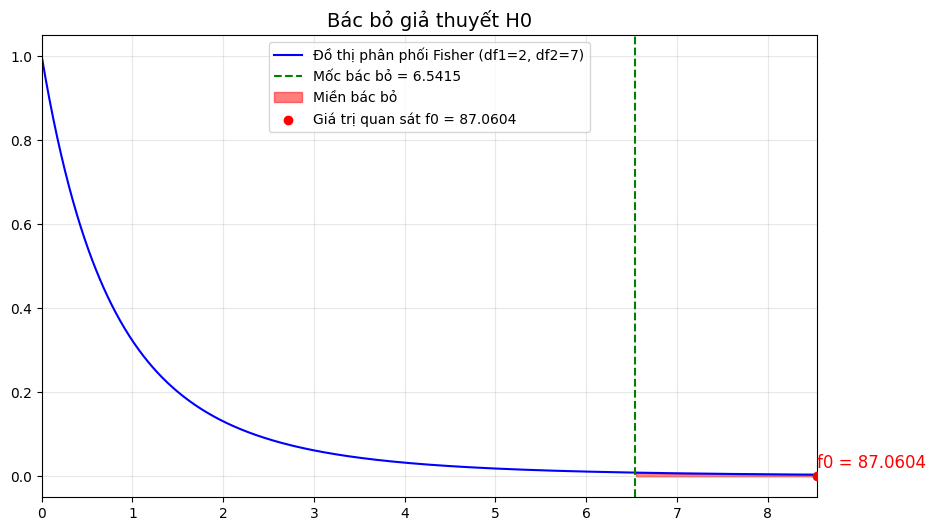

In [276]:
Analysis_of_Variance_mul(x,y,0.05,2)

In [277]:
print_anova_mul(x,y,0.05,2)

,Nguồn,Tổng bình phương,Bậc tự do,Bình phương trung bình,f0
0,Hồi quy,1201.6897,2,600.84485,
1,Sai số,48.3103,7,6.901471,
2,Tổng,1250.0000,,,87.0604


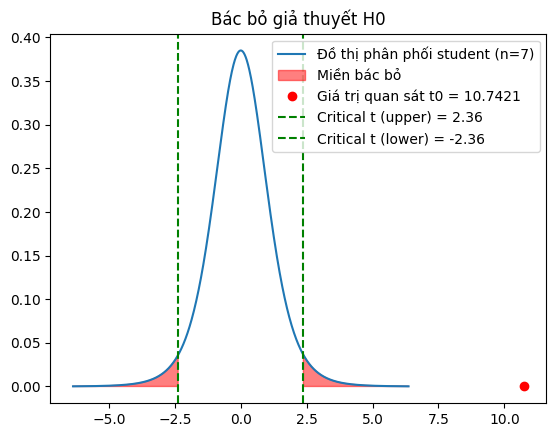

In [278]:
Hypothesis_testing_mul_sep(x,y,0.05,2,1)

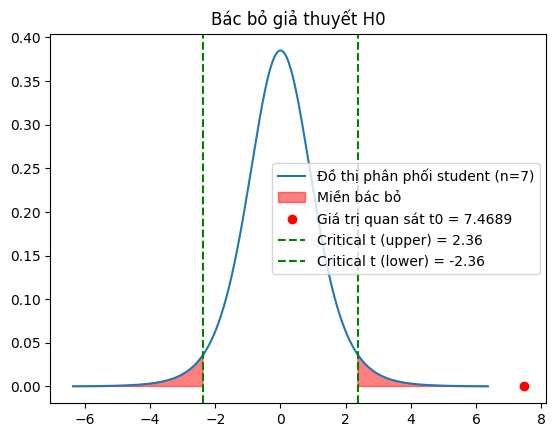

In [279]:
Hypothesis_testing_mul_sep(x,y,0.05,2,2)

In [280]:
R2 = R2(x,y)
print(f"Hệ số xác định R2 = {R2}")

Hệ số xác định R2 = 0.9613517599999992


In [282]:
print(f"- Số tiền trung bình chi tiêu cho thực phẩm tăng thêm 1 tăng thêm {My_Regession_Mul(x,y)[1][2]}triệu đồng ")

- Số tiền trung bình chi tiêu cho thực phẩm tăng thêm 1 tăng thêm 6.2437triệu đồng 
